In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# ALGORTIHM - 1 - LINEAR DISCRIMINANT ANALYSIS

In [77]:
file = pd.read_csv("keywordtrend.csv")

In [78]:
file.head(5)

,Keyword,Avgmonthlysearches,Competition,Ad impression share,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20
0,domestic flight offers,27100,High,12%,49500,40500,40500,40500,40500,40500,...,9900,1300,1900,2400,2400,3600,4400,5400,6600,6600
1,cheap domestic flights,9900,High,47%,12100,9900,9900,12100,12100,9900,...,6600,1600,1900,2400,1900,2400,2900,3600,4400,4400
2,card offer for flight booking,20,High,10%,20,10,10,10,10,10,...,20,10,10,10,10,10,20,30,30,20
3,cheapest flight bookings,12100,High,45%,5400,4400,5400,5400,6600,6600,...,9900,2400,3600,4400,5400,6600,8100,9900,12100,9900
4,flight domestic booking,6600,High,55%,5400,4400,4400,5400,5400,4400,...,5400,18100,33100,5400,5400,5400,5400,5400,6600,5400


In [79]:
file['mean_click']= file.mean(axis =1)

In [80]:
file.head()

,Keyword,Avgmonthlysearches,Competition,Ad impression share,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,...,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,mean_click
0,domestic flight offers,27100,High,12%,49500,40500,40500,40500,40500,40500,...,1300,1900,2400,2400,3600,4400,5400,6600,6600,27177.551020
1,cheap domestic flights,9900,High,47%,12100,9900,9900,12100,12100,9900,...,1600,1900,2400,1900,2400,2900,3600,4400,4400,9902.040816
2,card offer for flight booking,20,High,10%,20,10,10,10,10,10,...,10,10,10,10,10,20,30,30,20,18.979592
3,cheapest flight bookings,12100,High,45%,5400,4400,5400,5400,6600,6600,...,2400,3600,4400,5400,6600,8100,9900,12100,9900,12022.448980
4,flight domestic booking,6600,High,55%,5400,4400,4400,5400,5400,4400,...,18100,33100,5400,5400,5400,5400,5400,6600,5400,6916.326531


In [81]:
file.tail()

,Keyword,Avgmonthlysearches,Competition,Ad impression share,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,...,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,mean_click
103,bangalore to silchar flight ticket price,110,Low,< 1%,70,70,70,70,30,40,...,90,70,140,260,170,170,170,170,140,116.734694
104,tui flights,480,Low,48%,20,40,50,30,50,30,...,140,480,320,210,320,390,390,260,320,431.632653
105,tui,8100,Low,8%,8100,8100,9900,8100,9900,9900,...,6600,6600,6600,6600,8100,8100,8100,6600,8100,8053.061224
106,fly tui,320,Low,NaN,320,320,390,320,320,320,...,210,170,170,210,170,140,110,140,140,344.285714
107,tui airlines,320,Low,2%,90,90,140,90,90,170,...,260,260,480,260,260,260,170,210,320,306.326531


In [87]:
file['Competition'].replace('High',2, inplace=True)
file['Competition'].replace('Medium',1, inplace=True)
file['Competition'].replace('Low',0, inplace=True)

In [88]:
x = file[['Avgmonthlysearches','mean_click']]
y = file['Competition']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
103    0
104    0
105    0
106    0
107    0
Name: Competition, Length: 108, dtype: int64


In [96]:
file.tail()

,Keyword,Avgmonthlysearches,Competition,Ad impression share,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,...,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,mean_click
103,bangalore to silchar flight ticket price,110,0,< 1%,70,70,70,70,30,40,...,90,70,140,260,170,170,170,170,140,116.734694
104,tui flights,480,0,48%,20,40,50,30,50,30,...,140,480,320,210,320,390,390,260,320,431.632653
105,tui,8100,0,8%,8100,8100,9900,8100,9900,9900,...,6600,6600,6600,6600,8100,8100,8100,6600,8100,8053.061224
106,fly tui,320,0,NaN,320,320,390,320,320,320,...,210,170,170,210,170,140,110,140,140,344.285714
107,tui airlines,320,0,2%,90,90,140,90,90,170,...,260,260,480,260,260,260,170,210,320,306.326531


In [97]:
# splitting the dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [98]:
#performing linear discriminant analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(x, y)

In [101]:
y_pred = lda.predict(x_test)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.86      1.00      0.93        19

    accuracy                           0.86        22
   macro avg       0.43      0.50      0.46        22
weighted avg       0.75      0.86      0.80        22



# ALOGRITHM - 2-  DECISION TREE

In [105]:
file['Competition'].replace('High',2, inplace=True)
file['Competition'].replace('Medium',1, inplace=True)
file['Competition'].replace('Low',0, inplace=True)

In [106]:
x = file[['Avgmonthlysearches','mean_click']] # input labels which are numerical values 
y = file['Competition'] # labels which is categorical

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 10)

In [108]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [117]:
clf=DecisionTreeClassifier(criterion='entropy' ,min_samples_split=20) #min samples that is required to split the internal node
clf.fit(x_train,y_train)
print('Accuracy score on train sets :', accuracy_score(y_true=y_train , y_pred=clf.predict(x_train)))
print('Accuracy score on test sets :', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))

Accuracy score on train sets : 0.8953488372093024
Accuracy score on test sets : 0.8636363636363636


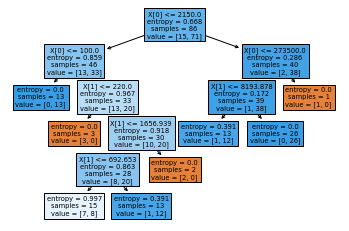

In [118]:
from sklearn.tree import plot_tree  # ploting of decision tree
import matplotlib.pyplot as plt
%matplotlib inline
plot_tree(clf,filled=True)
plt.show()

# ALGORITHM - 3 - GRADIENT DESCENT

In [3]:
data = pd.read_csv('C:/Users/SAHARSH TRIPATHI/Downloads/keywordtrend (1).csv')

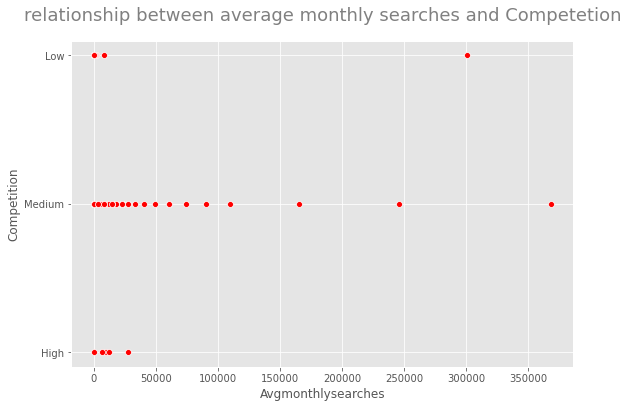

In [4]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(y='Competition', x='Avgmonthlysearches', data=data, ax=ax, color='red')
ax.set_title('relationship between average monthly searches and Competetion', pad=20, size=18, color='grey')
plt.savefig('scatterplot.png')

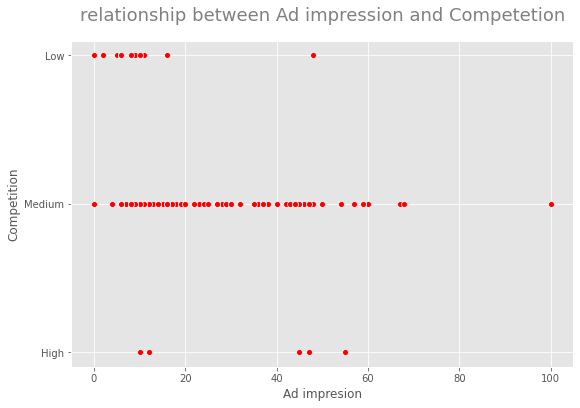

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(y='Competition', x='Ad impresion', data=data, ax=ax, color='red')
ax.set_title('relationship between Ad impression and Competetion', pad=20, size=18, color='grey')
plt.savefig('scatterplot.png')

In [6]:
data['Competition'].replace('High',2, inplace=True)
data['Competition'].replace('Medium',1, inplace=True)
data['Competition'].replace('Low',0, inplace=True)

In [7]:
m = data['Competition'].values.size

In [8]:
X=np.append(np.ones((m, 1)), data['Ad impresion'].values.reshape(m, 1), axis=1)

In [9]:
y = data['Competition'].values.reshape(m,1)

In [10]:
theta = np.zeros((2,1))

In [11]:
#Computing cost function
def cost_function(X, y, theta):
    y_pred = np.dot(X, theta)
    sqr_error = (y_pred-y)**2
    cost = 1/(2*m)*np.sum(sqr_error)
    return cost

In [12]:
cost_function(X, y, theta)

0.4907407407407407

In [13]:
#Run the Gradient Descent
def grdt_dscnt(X, y, theta, alpha, iterations):
    costs=[]
    for i in range(iterations):
        y_pred = np.dot(X, theta)
        der = np.dot(X.transpose(), (y_pred - y)) /m
        theta -=alpha*der
        costs.append(cost_function(X, y, theta))
        
    return theta, costs

In [14]:
theta, costs = grdt_dscnt(X, y, theta, alpha=0.000068, iterations=10000)

In [15]:
theta

array([[0.14735575],
       [0.02184435]])

In [16]:
costs[-1]# minimum cost always store in last index of array

0.13436413457032814

Text(0, 0.5, 'Theta')

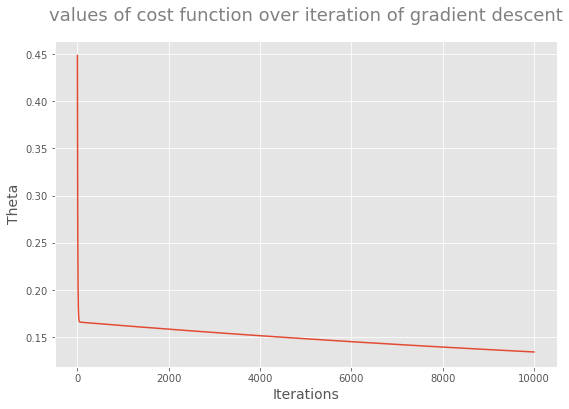

In [17]:
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(costs)
ax.set_title("values of cost function over iteration of gradient descent", pad=20, size=18, color = 'grey')
ax.set_xlabel("Iterations", size=14)
ax.set_ylabel("Theta", size=14)

In [18]:
#Train the model for making predictions
np.round(theta, 3)
# b0=0.147 & b1 = 0.022
# competiton = 0.147+0.022*Ad impresion

array([[0.147],
       [0.022]])

In [19]:
y_pred = np.dot(X, np.round(theta, 3))
dic = {'competition(actual)':y.flatten(),'competition(predicted)':np.round(y_pred, 0).flatten()}
df1 = pd.DataFrame(dic)


In [20]:
df1.tail()

,competition(actual),competition(predicted)
103,0,0.0
104,0,1.0
105,0,0.0
106,0,0.0
107,0,0.0


In [21]:
 #Evaluate the model performanc.
column_1 = data["Ad impresion"]
column_2 = data["Competition"]
correlation = column_1. corr(column_2)
print(correlation)

MSE = ((y-y_pred)**2).sum()/m
RMSE = np.sqrt(MSE)
print('MSE: ', np.round(MSE, 2))
print('RMSE: ', np.round(RMSE, 2))

0.35600385280538765
MSE:  0.27
RMSE:  0.52


In [4]:
data = pd.read_csv('C:/Users/SAHARSH TRIPATHI/Downloads/keywordtrend (1).csv')
X=data.iloc[:,2]
data['Competition'].replace('High',2, inplace=True)
data['Competition'].replace('Medium',1, inplace=True)
data['Competition'].replace('Low',0, inplace=True)
y= data.iloc[:,3]

In [6]:
# evaluate gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy: 89.867 (0.030)
